In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Install  UMAP and MAGIC for comparison
!pip install umap-learn magic-impute
!pip install scprep umap-learn magic-impute
#you need to install s_gd2 https://github.com/jxz12/s_gd2 #this is version (s-gd2==1.7) is stable
!pip install s-gd2==1.7
import requests
import os
import urllib.request
url_sc_phenix = 'https://raw.githubusercontent.com/resendislab/sc-PHENIX/main/sc-PHENIX%20tutorial%20colab/sc_PHENIX.py'
urllib.request.urlretrieve(url_sc_phenix, 'sc_PHENIX.py')
os.listdir()
!cd /content
!ls



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 922.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.8/56.8 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.1/94.1 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.4/53.4 kB 2.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for s-gd2: filename=s_gd2-1.7-cp310-cp310-linux_x86_64.whl size=537553 sha256=db187ac772c39b827725f87e548a4e0ca8db678aa5b16db13705bed1b02b04c8
  Stored in directory: /root/.cache/pip/wheels/01/22/1b/8ad6ccdf7a37dbdd2a19afd4958d3b00516c88de69e5860f2d
Successfully built s-gd2
drive  sample_data  sc_PHENIX.py


In [3]:
import pandas as pd
import umap
import scprep
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# Datos originales de microarreglos del desarrollo de C. Elegans

TrueEXpre = scprep.io.load_csv('/content/drive/MyDrive/Cristian Padrón/viernes 30 de oct/Supplementary_table_1.csv',cell_axis= 'row')
TrueEXpre = np.exp(TrueEXpre)

TrueEXpre = TrueEXpre.T

In [4]:
import pandas as pd
import numpy as np

def insertar_ceros_aleatorios(df, porcentaje=10, semilla=42):
    """
    Inserta ceros de manera aleatoria en un DataFrame basado en un porcentaje especificado y es reproducible por una semilla.

    Parámetros:
    df (pd.DataFrame): DataFrame original.
    porcentaje (int, opcional): Porcentaje de ceros a insertar. Por defecto es 10%.
    semilla (int, opcional): Semilla para el generador de números aleatorios. Por defecto es 42.

    Retorna:
    pd.DataFrame: DataFrame con ceros insertados aleatoriamente y reproducibilidad garantizada.
    """
    # Fijar la semilla del generador de números aleatorios para reproducibilidad
    np.random.seed(semilla)

    # Calcular el número total de elementos en el DataFrame
    total_elementos = df.size

    # Calcular el número de elementos a cambiar a cero
    num_ceros = int(total_elementos * (porcentaje / 100))

    # Generar pares de índices únicos
    indices = np.random.choice(total_elementos, num_ceros, replace=False)
    indices_fila = indices // df.shape[1]
    indices_columna = indices % df.shape[1]

    # Crear una copia del DataFrame para modificar
    df_modificado = df.copy()

    # Insertar ceros en los índices seleccionados
    df_modificado.values[indices_fila, indices_columna] = 0

    return df_modificado


In [7]:
from sc_PHENIX import run_pca, sc_PHENIX

"""
PCA-UMAP    init can be fixed

"""
dropout = insertar_ceros_aleatorios(TrueEXpre, porcentaje=80, semilla=62)
pca_data = run_pca(dropout, n_components=60, random_state=1)
umap_fit = umap.UMAP(n_components=30,n_epochs=3000,n_neighbors=220,negative_sample_rate=100,metric='cosine', random_state=1)
umap_dim = umap_fit.fit_transform(pca_data)

process start Tue May 14 02:17:41 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


In [8]:
umap_dim.shape

(206, 30)

[[ -8.227222     0.35347274 -17.13204    ... -14.12482      0.0630269
    7.3612504 ]
 [ -7.946903     1.0838298  -17.428942   ... -13.847647     0.46021247
    8.378776  ]
 [ -8.396204     1.1641101  -17.533623   ... -14.261692     0.803402
    7.6300488 ]
 ...
 [ -7.973775    -0.99793786 -17.17029    ... -13.47942     -2.430692
    6.498403  ]
 [ -8.3773985   -1.1730494  -17.555838   ... -13.289652    -2.9217339
    6.6974754 ]
 [ -8.364833    -0.61143833 -17.477087   ... -13.564698    -1.6708918
    6.858391  ]]


Processing KNN Values:   0%|          | 0/99 [00:00<?, ?it/s]

knn:  1
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 1.13 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.22 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:34 2024


Processing KNN Values:   1%|          | 1/99 [00:03<05:55,  3.63s/it]

knn:  2
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.97 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:37 2024


Processing KNN Values:   2%|▏         | 2/99 [00:06<05:35,  3.46s/it]

knn:  3
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.03 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:41 2024


Processing KNN Values:   3%|▎         | 3/99 [00:11<06:00,  3.76s/it]

knn:  4
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.41 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 1.51 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.67 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:46 2024


Processing KNN Values:   4%|▍         | 4/99 [00:15<06:21,  4.02s/it]

knn:  5
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.13 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:49 2024


Processing KNN Values:   5%|▌         | 5/99 [00:18<05:54,  3.77s/it]

knn:  6
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.01 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:52 2024


Processing KNN Values:   6%|▌         | 6/99 [00:22<05:39,  3.65s/it]

knn:  7
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.00 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:20:56 2024


Processing KNN Values:   7%|▋         | 7/99 [00:26<05:45,  3.76s/it]

knn:  8
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.25 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.53 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:01 2024


Processing KNN Values:   8%|▊         | 8/99 [00:30<05:56,  3.92s/it]

knn:  9
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.02 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.13 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:04 2024


Processing KNN Values:   9%|▉         | 9/99 [00:34<05:41,  3.79s/it]

knn:  10
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.91 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.16 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:08 2024


Processing KNN Values:  10%|█         | 10/99 [00:37<05:32,  3.74s/it]

knn:  11
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 1.07 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.17 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:12 2024


Processing KNN Values:  11%|█         | 11/99 [00:41<05:39,  3.86s/it]

knn:  12
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.42 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.58 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:16 2024


Processing KNN Values:  12%|█▏        | 12/99 [00:46<05:47,  4.00s/it]

knn:  13
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.10 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:20 2024


Processing KNN Values:  13%|█▎        | 13/99 [00:49<05:26,  3.80s/it]

knn:  14
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.79 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.89 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:23 2024


Processing KNN Values:  14%|█▍        | 14/99 [00:52<05:05,  3.60s/it]

knn:  15
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.83 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.92 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:26 2024


Processing KNN Values:  15%|█▌        | 15/99 [00:56<05:07,  3.66s/it]

knn:  16
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.26 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.57 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:31 2024


Processing KNN Values:  16%|█▌        | 16/99 [01:01<05:28,  3.96s/it]

knn:  17
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.87 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 1.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.11 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:35 2024


Processing KNN Values:  17%|█▋        | 17/99 [01:04<05:11,  3.80s/it]

knn:  18
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.90 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.03 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.13 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:38 2024


Processing KNN Values:  18%|█▊        | 18/99 [01:07<04:59,  3.70s/it]

knn:  19
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.76 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.86 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:41 2024


Processing KNN Values:  19%|█▉        | 19/99 [01:11<04:48,  3.61s/it]

knn:  20
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 2.33 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.04 seconds.
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 2.54 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.18 seconds.
Calculated MAGIC in 2.80 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:47 2024


Processing KNN Values:  20%|██        | 20/99 [01:17<05:35,  4.25s/it]

knn:  21
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.97 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:50 2024


Processing KNN Values:  21%|██        | 21/99 [01:20<05:09,  3.96s/it]

knn:  22
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.05 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:54 2024


Processing KNN Values:  22%|██▏       | 22/99 [01:23<04:53,  3.81s/it]

knn:  23
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.02 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:21:57 2024


Processing KNN Values:  23%|██▎       | 23/99 [01:27<04:46,  3.78s/it]

knn:  24
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.30 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.46 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:02 2024


Processing KNN Values:  24%|██▍       | 24/99 [01:31<04:57,  3.97s/it]

knn:  25
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.89 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.99 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:05 2024


Processing KNN Values:  25%|██▌       | 25/99 [01:35<04:36,  3.74s/it]

knn:  26
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.80 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.89 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:08 2024


Processing KNN Values:  26%|██▋       | 26/99 [01:38<04:21,  3.59s/it]

knn:  27
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.89 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.99 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:12 2024


Processing KNN Values:  27%|██▋       | 27/99 [01:41<04:19,  3.60s/it]

knn:  28
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.31 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.45 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.60 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:16 2024


Processing KNN Values:  28%|██▊       | 28/99 [01:46<04:43,  3.99s/it]

knn:  29
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.07 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:20 2024


Processing KNN Values:  29%|██▉       | 29/99 [01:50<04:26,  3.81s/it]

knn:  30
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.05 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:24 2024


Processing KNN Values:  30%|███       | 30/99 [01:53<04:13,  3.68s/it]

knn:  31
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.79 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.88 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:27 2024


Processing KNN Values:  31%|███▏      | 31/99 [01:56<03:58,  3.51s/it]

knn:  32
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.43 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.72 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:31 2024


Processing KNN Values:  32%|███▏      | 32/99 [02:01<04:26,  3.98s/it]

knn:  33
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.83 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.94 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:35 2024


Processing KNN Values:  33%|███▎      | 33/99 [02:05<04:09,  3.77s/it]

knn:  34
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.96 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.07 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:39 2024


Processing KNN Values:  34%|███▍      | 34/99 [02:08<04:00,  3.70s/it]

knn:  35
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.07 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:42 2024


Processing KNN Values:  35%|███▌      | 35/99 [02:12<03:55,  3.67s/it]

knn:  36
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.35 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.44 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.58 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:47 2024


Processing KNN Values:  36%|███▋      | 36/99 [02:16<04:07,  3.94s/it]

knn:  37
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 1.27 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.38 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:51 2024


Processing KNN Values:  37%|███▋      | 37/99 [02:20<04:01,  3.90s/it]

knn:  38
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
  Calculated graph and diffusion operator in 0.83 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.94 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:54 2024


Processing KNN Values:  38%|███▊      | 38/99 [02:23<03:45,  3.70s/it]

knn:  39
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:22:57 2024


Processing KNN Values:  39%|███▉      | 39/99 [02:27<03:37,  3.62s/it]

knn:  40
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.02 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.16 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:01 2024


Processing KNN Values:  40%|████      | 40/99 [02:31<03:45,  3.82s/it]

knn:  41
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.32 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.46 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:06 2024


Processing KNN Values:  41%|████▏     | 41/99 [02:35<03:48,  3.93s/it]

knn:  42
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.20 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.30 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.45 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:10 2024


Processing KNN Values:  42%|████▏     | 42/99 [02:40<03:57,  4.16s/it]

knn:  43
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.86 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.96 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:14 2024


Processing KNN Values:  43%|████▎     | 43/99 [02:43<03:39,  3.91s/it]

knn:  44
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.31 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.61 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:18 2024


Processing KNN Values:  44%|████▍     | 44/99 [02:48<03:48,  4.16s/it]

knn:  45
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.33 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.45 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:22 2024


Processing KNN Values:  45%|████▌     | 45/99 [02:52<03:38,  4.04s/it]

knn:  46
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.74 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.97 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:26 2024


Processing KNN Values:  46%|████▋     | 46/99 [02:55<03:22,  3.81s/it]

knn:  47
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.92 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.09 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:29 2024


Processing KNN Values:  47%|████▋     | 47/99 [02:59<03:14,  3.74s/it]

knn:  48
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.09 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 1.96 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.28 seconds.
Calculated MAGIC in 2.28 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:34 2024


Processing KNN Values:  48%|████▊     | 48/99 [03:04<03:37,  4.26s/it]

knn:  49
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.11 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.25 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.36 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:39 2024


Processing KNN Values:  49%|████▉     | 49/99 [03:08<03:27,  4.16s/it]

knn:  50
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.90 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 1.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.11 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:42 2024


Processing KNN Values:  51%|█████     | 50/99 [03:11<03:13,  3.95s/it]

knn:  51
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.91 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.17 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:46 2024


Processing KNN Values:  52%|█████▏    | 51/99 [03:15<03:04,  3.84s/it]

knn:  52
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.27 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.37 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.50 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:50 2024


Processing KNN Values:  53%|█████▎    | 52/99 [03:20<03:10,  4.05s/it]

knn:  53
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.04 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.16 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:54 2024


Processing KNN Values:  54%|█████▎    | 53/99 [03:23<02:58,  3.88s/it]

knn:  54
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.86 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.95 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:23:57 2024


Processing KNN Values:  55%|█████▍    | 54/99 [03:26<02:47,  3.72s/it]

knn:  55
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.90 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.05 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.14 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:01 2024


Processing KNN Values:  56%|█████▌    | 55/99 [03:30<02:41,  3.68s/it]

knn:  56
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.34 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.48 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:05 2024


Processing KNN Values:  57%|█████▋    | 56/99 [03:34<02:48,  3.92s/it]

knn:  57
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.38 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.53 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.63 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:09 2024


Processing KNN Values:  58%|█████▊    | 57/99 [03:38<02:44,  3.91s/it]

knn:  58
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.00 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:12 2024


Processing KNN Values:  59%|█████▊    | 58/99 [03:42<02:32,  3.72s/it]

knn:  59
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:16 2024


Processing KNN Values:  60%|█████▉    | 59/99 [03:45<02:23,  3.59s/it]

knn:  60
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.89 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.98 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:19 2024


Processing KNN Values:  61%|██████    | 60/99 [03:49<02:26,  3.76s/it]

knn:  61
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.35 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.42 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.57 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:24 2024


Processing KNN Values:  62%|██████▏   | 61/99 [03:53<02:27,  3.89s/it]

knn:  62
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.84 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.93 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:27 2024


Processing KNN Values:  63%|██████▎   | 62/99 [03:57<02:19,  3.77s/it]

knn:  63
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.86 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.98 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:31 2024


Processing KNN Values:  64%|██████▎   | 63/99 [04:00<02:09,  3.60s/it]

knn:  64
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.04 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:34 2024


Processing KNN Values:  65%|██████▍   | 64/99 [04:04<02:07,  3.65s/it]

knn:  65
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.30 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.43 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.56 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:39 2024


Processing KNN Values:  66%|██████▌   | 65/99 [04:08<02:10,  3.85s/it]

knn:  66
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.76 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.84 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.95 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:42 2024


Processing KNN Values:  67%|██████▋   | 66/99 [04:11<02:01,  3.68s/it]

knn:  67
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.08 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:45 2024


Processing KNN Values:  68%|██████▊   | 67/99 [04:15<01:55,  3.60s/it]

knn:  68
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.04 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:49 2024


Processing KNN Values:  69%|██████▊   | 68/99 [04:19<01:55,  3.71s/it]

knn:  69
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 1.26 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.40 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:53 2024


Processing KNN Values:  70%|██████▉   | 69/99 [04:23<01:55,  3.86s/it]

knn:  70
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.07 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:24:57 2024


Processing KNN Values:  71%|███████   | 70/99 [04:26<01:48,  3.74s/it]

knn:  71
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.18 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:01 2024


Processing KNN Values:  72%|███████▏  | 71/99 [04:30<01:43,  3.69s/it]

knn:  72
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.87 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.95 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.05 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:04 2024


Processing KNN Values:  73%|███████▎  | 72/99 [04:34<01:40,  3.72s/it]

knn:  73
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.42 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.52 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.68 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:09 2024


Processing KNN Values:  74%|███████▎  | 73/99 [04:38<01:43,  3.98s/it]

knn:  74
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.85 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.96 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:12 2024


Processing KNN Values:  75%|███████▍  | 74/99 [04:42<01:35,  3.80s/it]

knn:  75
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.03 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:16 2024


Processing KNN Values:  76%|███████▌  | 75/99 [04:45<01:27,  3.64s/it]

knn:  76
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.95 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:19 2024


Processing KNN Values:  77%|███████▋  | 76/99 [04:49<01:25,  3.71s/it]

knn:  77
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.22 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 1.33 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.47 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:24 2024


Processing KNN Values:  78%|███████▊  | 77/99 [04:53<01:25,  3.89s/it]

knn:  78
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.95 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:27 2024


Processing KNN Values:  79%|███████▉  | 78/99 [04:57<01:19,  3.76s/it]

knn:  79
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.03 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 1.12 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:31 2024


Processing KNN Values:  80%|███████▉  | 79/99 [05:00<01:13,  3.69s/it]

knn:  80
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.95 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:34 2024


Processing KNN Values:  81%|████████  | 80/99 [05:04<01:09,  3.68s/it]

knn:  81
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.16 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.25 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.39 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:39 2024


Processing KNN Values:  82%|████████▏ | 81/99 [05:08<01:10,  3.90s/it]

knn:  82
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.75 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.83 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.93 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:42 2024


Processing KNN Values:  83%|████████▎ | 82/99 [05:12<01:04,  3.78s/it]

knn:  83
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.07 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.18 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:46 2024


Processing KNN Values:  84%|████████▍ | 83/99 [05:15<00:58,  3.69s/it]

knn:  84
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.86 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.96 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:49 2024


Processing KNN Values:  85%|████████▍ | 84/99 [05:19<00:54,  3.66s/it]

knn:  85
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.40 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 1.54 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.69 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:54 2024


Processing KNN Values:  86%|████████▌ | 85/99 [05:23<00:55,  3.95s/it]

knn:  86
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.88 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.96 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:25:57 2024


Processing KNN Values:  87%|████████▋ | 86/99 [05:27<00:49,  3.81s/it]

knn:  87
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.95 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.05 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.19 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:01 2024


Processing KNN Values:  88%|████████▊ | 87/99 [05:31<00:45,  3.77s/it]

knn:  88
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.00 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.09 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.21 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:05 2024


Processing KNN Values:  89%|████████▉ | 88/99 [05:35<00:43,  3.91s/it]

knn:  89
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.23 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 1.33 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.48 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:10 2024


Processing KNN Values:  90%|████████▉ | 89/99 [05:39<00:40,  4.10s/it]

knn:  90
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 1.10 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.20 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:14 2024


Processing KNN Values:  91%|█████████ | 90/99 [05:43<00:35,  3.97s/it]

knn:  91
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.85 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.95 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:17 2024


Processing KNN Values:  92%|█████████▏| 91/99 [05:46<00:30,  3.80s/it]

knn:  92
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.88 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.99 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:21 2024


Processing KNN Values:  93%|█████████▎| 92/99 [05:50<00:26,  3.82s/it]

knn:  93
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.32 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.48 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:25 2024


Processing KNN Values:  94%|█████████▍| 93/99 [05:55<00:23,  3.99s/it]

knn:  94
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.97 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:29 2024


Processing KNN Values:  95%|█████████▍| 94/99 [05:58<00:18,  3.76s/it]

knn:  95
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.78 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.84 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.95 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:32 2024


Processing KNN Values:  96%|█████████▌| 95/99 [06:01<00:14,  3.64s/it]

knn:  96
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.84 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.07 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:35 2024


Processing KNN Values:  97%|█████████▋| 96/99 [06:05<00:11,  3.68s/it]

knn:  97
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.40 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.55 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.70 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:40 2024


Processing KNN Values:  98%|█████████▊| 97/99 [06:10<00:08,  4.05s/it]

knn:  98
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.87 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.00 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:44 2024


Processing KNN Values:  99%|█████████▉| 98/99 [06:13<00:03,  3.86s/it]

knn:  99
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.88 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 1.02 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 1.13 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:26:48 2024


Processing KNN Values: 100%|██████████| 99/99 [06:17<00:00,  3.81s/it]


Results saved to analysis_results_t5_d5_seed62_por80_n_pca60_knn1-99.xlsx
  Method Parameter Value   Pearson  Spearman        R2
0  MAGIC       knn     1  0.033862  0.399399  0.001147
1  MAGIC       knn     1  0.151855  0.468202  0.023060
2  MAGIC       knn     1  0.083718  0.477244  0.007009
3  MAGIC       knn     1  0.170839  0.492051  0.029186
4  MAGIC       knn     1  0.205326  0.527637  0.042159


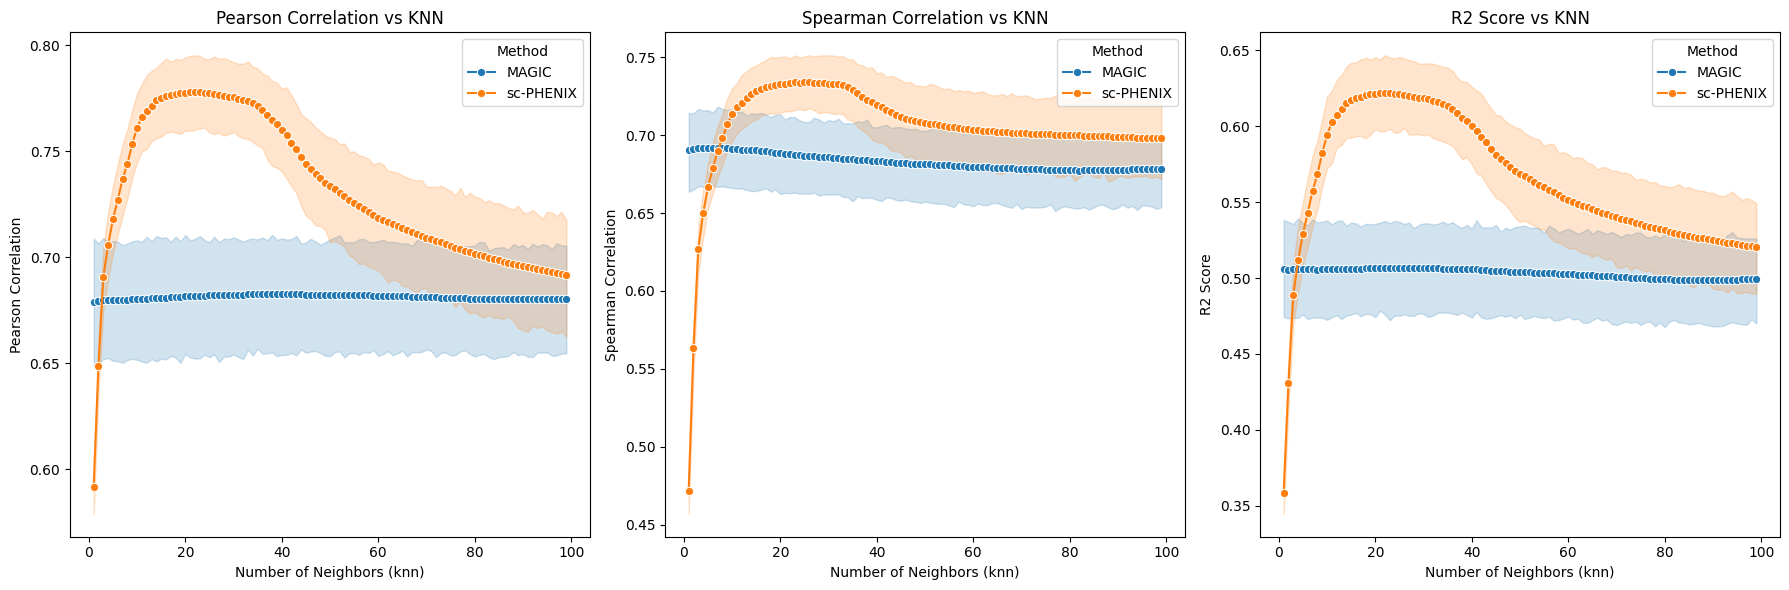

In [9]:
import pandas as pd
import numpy as np
import magic
import umap
from sc_PHENIX import run_pca, sc_PHENIX
from scipy.stats import spearmanr
from tqdm import tqdm  # Añadir barra de progreso

def run_analysis_knn_variation(real=None, porcentaje=80, seed=62, t=5, decay=5, n_pca=30, knn_range=range(1, 50),umap_dim =None):
    np.random.seed(seed)
    umap_dim=umap_dim
    print(umap_dim)
    # Asumiendo que `insertar_ceros_aleatorios` es una función definida para introducir dropout
    dropout = insertar_ceros_aleatorios(real, porcentaje=porcentaje, semilla=seed)
    real = real.to_numpy()  # Convertir el DataFrame de pandas a un array de numpy si aún no lo es

    # DataFrame para almacenar los resultados
    results = pd.DataFrame(columns=['Method', 'Parameter', 'Value', 'Pearson', 'Spearman', 'R2'])

    for knn in tqdm(knn_range, desc='Processing KNN Values'):
        print('knn: ',knn)
        # Configurar y aplicar MAGIC
        magic_operator = magic.MAGIC(n_pca=n_pca, t=t, knn=knn, decay=decay, random_state=1,knn_max=200)
        imputed_magic = magic_operator.fit_transform(dropout)

        # Calcular métricas para MAGIC
        new_rows = []
        for i in range(imputed_magic.shape[0]):  # Asumiendo que imputed_magic es un DataFrame
            real_sample = real[i, :]
            imputed_sample = imputed_magic.iloc[i, :].to_numpy()  # Convertir la fila del DataFrame a numpy
            pearson = np.corrcoef(real_sample, imputed_sample)[0, 1]
            spearman = spearmanr(real_sample, imputed_sample).correlation
            r2 = pearson**2
            new_rows.append({'Method': 'MAGIC', 'Parameter': 'knn', 'Value': knn, 'Pearson': pearson, 'Spearman': spearman, 'R2': r2})

        results = pd.concat([results, pd.DataFrame(new_rows)], ignore_index=True)

        # Configurar y aplicar sc-PHENIX
        """
        pca_data = run_pca(dropout, n_components=n_pca, random_state=1)
        umap_fit = umap.UMAP(n_components=20, n_neighbors=knn, min_dist=0.1, n_epochs=500, random_state=1)
        u_no_3 = umap_fit.fit_transform(pca_data)
        """
        imputed_phenix = sc_PHENIX(dropout, umap_dim, t=t, knn=knn, decay=decay)

        # Calcular métricas para sc-PHENIX
        new_rows = []
        for i in range(imputed_phenix.shape[0]):  # Asumiendo que imputed_phenix es un DataFrame
            real_sample = real[i, :]
            imputed_sample = imputed_phenix.iloc[i, :].to_numpy()  # Convertir la fila del DataFrame a numpy
            pearson = np.corrcoef(real_sample, imputed_sample)[0, 1]
            spearman = spearmanr(real_sample, imputed_sample).correlation
            r2 = pearson**2
            new_rows.append({'Method': 'sc-PHENIX', 'Parameter': 'knn', 'Value': knn, 'Pearson': pearson, 'Spearman': spearman, 'R2': r2})

        results = pd.concat([results, pd.DataFrame(new_rows)], ignore_index=True)

    # Construyendo el nombre del archivo basado en todos los argumentos
    filename = f"analysis_results_t{t}_d{decay}_seed{seed}_por{porcentaje}_n_pca{n_pca}_knn{knn_range.start}-{knn_range.stop-1}.xlsx"
    results.to_excel(filename, index=False)
    print(f"Results saved to {filename}")

    return results

# Ejemplo de uso de la función con datos simulados
results = run_analysis_knn_variation(real=TrueEXpre, porcentaje=80, seed=62, t=5, decay=5, n_pca=30, knn_range=range(1, 100),umap_dim=umap_dim)
print(results.head())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Subplot for Pearson correlation
plt.subplot(1, 3, 1)
sns.lineplot(data=results, x='Value', y='Pearson', hue='Method', marker='o')
plt.title('Pearson Correlation vs KNN')
plt.xlabel('Number of Neighbors (knn)')
plt.ylabel('Pearson Correlation')

# Subplot for Spearman correlation
plt.subplot(1, 3, 2)
sns.lineplot(data=results, x='Value', y='Spearman', hue='Method', marker='o')
plt.title('Spearman Correlation vs KNN')
plt.xlabel('Number of Neighbors (knn)')
plt.ylabel('Spearman Correlation')

# Subplot for R2 Score
plt.subplot(1, 3, 3)
sns.lineplot(data=results, x='Value', y='R2', hue='Method', marker='o')
plt.title('R2 Score vs KNN')
plt.xlabel('Number of Neighbors (knn)')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


process start Mon May 13 03:54:26 2024


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:2437: UserWarning: n_neighbors is larger than the dataset size; truncating to X.shape[0] - 1
  warn(


[[ -8.227222     0.35347274 -17.13204    ... -14.12482      0.0630269
    7.3612504 ]
 [ -7.946903     1.0838298  -17.428942   ... -13.847647     0.46021247
    8.378776  ]
 [ -8.396204     1.1641101  -17.533623   ... -14.261692     0.803402
    7.6300488 ]
 ...
 [ -7.973775    -0.99793786 -17.17029    ... -13.47942     -2.430692
    6.498403  ]
 [ -8.3773985   -1.1730494  -17.555838   ... -13.289652    -2.9217339
    6.6974754 ]
 [ -8.364833    -0.61143833 -17.477087   ... -13.564698    -1.6708918
    6.858391  ]]


Processing KNN Values:   0%|          | 0/99 [00:00<?, ?it/s]

knn:  1
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.58 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.77 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:10 2024


Processing KNN Values:   1%|          | 1/99 [00:03<05:06,  3.13s/it]

knn:  2
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.68 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:12 2024


Processing KNN Values:   2%|▏         | 2/99 [00:06<04:49,  2.98s/it]

knn:  3
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.51 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.56 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 0.68 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:16 2024


Processing KNN Values:   3%|▎         | 3/99 [00:10<06:08,  3.84s/it]

knn:  4
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.30 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.14 seconds.
Calculated MAGIC in 1.60 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:23 2024


Processing KNN Values:   4%|▍         | 4/99 [00:17<07:50,  4.95s/it]

knn:  5
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.02 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.18 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.12 seconds.
Calculated MAGIC in 1.37 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:29 2024


Processing KNN Values:   5%|▌         | 5/99 [00:26<10:12,  6.52s/it]

knn:  6
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.30 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.46 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.16 seconds.
Calculated MAGIC in 1.69 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:38 2024


Processing KNN Values:   6%|▌         | 6/99 [00:32<09:26,  6.10s/it]

knn:  7
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.12 seconds.
Calculated MAGIC in 1.09 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:43 2024


Processing KNN Values:   7%|▋         | 7/99 [00:36<08:30,  5.55s/it]

knn:  8
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.74 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 0.89 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:47 2024


Processing KNN Values:   8%|▊         | 8/99 [00:40<07:43,  5.09s/it]

knn:  9
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.10 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.24 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:51 2024


Processing KNN Values:   9%|▉         | 9/99 [00:44<07:13,  4.82s/it]

knn:  10
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.62 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.73 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:54 2024


Processing KNN Values:  10%|█         | 10/99 [00:47<06:22,  4.30s/it]

knn:  11
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.77 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:53:57 2024


Processing KNN Values:  11%|█         | 11/99 [00:51<05:46,  3.94s/it]

knn:  12
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.61 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.79 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:01 2024


Processing KNN Values:  12%|█▏        | 12/99 [00:54<05:26,  3.75s/it]

knn:  13
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.73 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.12 seconds.
Calculated MAGIC in 0.89 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:04 2024


Processing KNN Values:  13%|█▎        | 13/99 [00:58<05:25,  3.78s/it]

knn:  14
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 0.97 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.12 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:09 2024


Processing KNN Values:  14%|█▍        | 14/99 [01:02<05:24,  3.82s/it]

knn:  15
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.52 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.67 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:12 2024


Processing KNN Values:  15%|█▌        | 15/99 [01:05<04:58,  3.55s/it]

knn:  16
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.69 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.81 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:15 2024


Processing KNN Values:  16%|█▌        | 16/99 [01:08<04:41,  3.39s/it]

knn:  17
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.48 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.53 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.62 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:18 2024


Processing KNN Values:  17%|█▋        | 17/99 [01:11<04:30,  3.30s/it]

knn:  18
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.77 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.88 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.03 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:22 2024


Processing KNN Values:  18%|█▊        | 18/99 [01:15<04:52,  3.62s/it]

knn:  19
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.92 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:25 2024


Processing KNN Values:  19%|█▉        | 19/99 [01:19<04:47,  3.59s/it]

knn:  20
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.87 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.13 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:29 2024


Processing KNN Values:  20%|██        | 20/99 [01:23<04:59,  3.79s/it]

knn:  21
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.88 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.99 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.11 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:33 2024


Processing KNN Values:  21%|██        | 21/99 [01:26<04:45,  3.66s/it]

knn:  22
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.74 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.08 seconds.
    Calculating affinities...
    Calculated affinities in 0.18 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.29 seconds.
Calculated MAGIC in 1.43 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:38 2024


Processing KNN Values:  22%|██▏       | 22/99 [01:32<05:32,  4.32s/it]

knn:  23
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.75 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:42 2024


Processing KNN Values:  23%|██▎       | 23/99 [01:35<05:02,  3.98s/it]

knn:  24
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.50 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.57 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.67 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:45 2024


Processing KNN Values:  24%|██▍       | 24/99 [01:38<04:36,  3.69s/it]

knn:  25
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.59 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.79 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:48 2024


Processing KNN Values:  25%|██▌       | 25/99 [01:42<04:28,  3.62s/it]

knn:  26
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 1.00 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.13 seconds.
Calculated MAGIC in 1.18 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:53 2024


Processing KNN Values:  26%|██▋       | 26/99 [01:47<04:53,  4.01s/it]

knn:  27
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.03 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.19 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:54:57 2024


Processing KNN Values:  27%|██▋       | 27/99 [01:50<04:40,  3.90s/it]

knn:  28
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.66 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.76 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:00 2024


Processing KNN Values:  28%|██▊       | 28/99 [01:53<04:19,  3.65s/it]

knn:  29
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.69 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.75 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.85 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:03 2024


Processing KNN Values:  29%|██▉       | 29/99 [01:57<04:06,  3.51s/it]

knn:  30
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.73 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.83 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:07 2024


Processing KNN Values:  30%|███       | 30/99 [02:00<04:02,  3.51s/it]

knn:  31
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.89 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.95 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.08 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:11 2024


Processing KNN Values:  31%|███▏      | 31/99 [02:04<04:10,  3.68s/it]

knn:  32
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.48 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.59 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.69 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:14 2024


Processing KNN Values:  32%|███▏      | 32/99 [02:07<03:55,  3.52s/it]

knn:  33
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.78 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:18 2024


Processing KNN Values:  33%|███▎      | 33/99 [02:11<04:01,  3.65s/it]

knn:  34
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.46 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.71 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:21 2024


Processing KNN Values:  34%|███▍      | 34/99 [02:14<03:46,  3.48s/it]

knn:  35
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.79 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.86 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.98 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:25 2024


Processing KNN Values:  35%|███▌      | 35/99 [02:18<03:51,  3.62s/it]

knn:  36
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.82 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.00 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:28 2024


Processing KNN Values:  36%|███▋      | 36/99 [02:22<03:40,  3.50s/it]

knn:  37
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.63 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.78 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.89 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:32 2024


Processing KNN Values:  37%|███▋      | 37/99 [02:25<03:31,  3.41s/it]

knn:  38
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.52 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.67 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:35 2024


Processing KNN Values:  38%|███▊      | 38/99 [02:28<03:21,  3.31s/it]

knn:  39
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.76 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:38 2024


Processing KNN Values:  39%|███▉      | 39/99 [02:32<03:26,  3.45s/it]

knn:  40
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.85 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.93 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 1.06 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:42 2024


Processing KNN Values:  40%|████      | 40/99 [02:36<03:34,  3.63s/it]

knn:  41
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.59 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.73 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.85 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:46 2024


Processing KNN Values:  41%|████▏     | 41/99 [02:39<03:23,  3.50s/it]

knn:  42
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.45 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.53 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.64 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:49 2024


Processing KNN Values:  42%|████▏     | 42/99 [02:42<03:11,  3.35s/it]

knn:  43
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.47 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.55 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.64 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:52 2024


Processing KNN Values:  43%|████▎     | 43/99 [02:45<03:03,  3.28s/it]

knn:  44
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.97 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.05 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.20 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:55:56 2024


Processing KNN Values:  44%|████▍     | 44/99 [02:49<03:17,  3.59s/it]

knn:  45
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.20 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.36 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:00 2024


Processing KNN Values:  45%|████▌     | 45/99 [02:53<03:16,  3.63s/it]

knn:  46
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.61 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.71 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:03 2024


Processing KNN Values:  46%|████▋     | 46/99 [02:56<03:03,  3.46s/it]

knn:  47
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.62 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.73 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:06 2024


Processing KNN Values:  47%|████▋     | 47/99 [02:59<02:54,  3.36s/it]

knn:  48
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.63 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.81 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:09 2024


Processing KNN Values:  48%|████▊     | 48/99 [03:03<02:53,  3.40s/it]

knn:  49
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.82 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 0.97 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:13 2024


Processing KNN Values:  49%|████▉     | 49/99 [03:07<02:58,  3.57s/it]

knn:  50
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.80 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:17 2024


Processing KNN Values:  51%|█████     | 50/99 [03:10<02:48,  3.44s/it]

knn:  51
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.61 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.71 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:20 2024


Processing KNN Values:  52%|█████▏    | 51/99 [03:13<02:38,  3.30s/it]

knn:  52
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.72 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.82 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:23 2024


Processing KNN Values:  53%|█████▎    | 52/99 [03:17<02:48,  3.59s/it]

knn:  53
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.90 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.06 seconds.
  Calculated graph and diffusion operator in 1.00 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.14 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:28 2024


Processing KNN Values:  54%|█████▎    | 53/99 [03:21<02:53,  3.77s/it]

knn:  54
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.67 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.74 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.86 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:31 2024


Processing KNN Values:  55%|█████▍    | 54/99 [03:24<02:40,  3.57s/it]

knn:  55
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.61 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.71 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:34 2024


Processing KNN Values:  56%|█████▌    | 55/99 [03:27<02:30,  3.42s/it]

knn:  56
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.78 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.88 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:37 2024


Processing KNN Values:  57%|█████▋    | 56/99 [03:31<02:24,  3.36s/it]

knn:  57
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.66 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.75 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:41 2024


Processing KNN Values:  58%|█████▊    | 57/99 [03:34<02:27,  3.52s/it]

knn:  58
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.04 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.13 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.30 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:45 2024


Processing KNN Values:  59%|█████▊    | 58/99 [03:39<02:32,  3.73s/it]

knn:  59
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.75 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:49 2024


Processing KNN Values:  60%|█████▉    | 59/99 [03:42<02:21,  3.53s/it]

knn:  60
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.56 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.78 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:52 2024


Processing KNN Values:  61%|██████    | 60/99 [03:45<02:14,  3.45s/it]

knn:  61
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.78 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:56:55 2024


Processing KNN Values:  62%|██████▏   | 61/99 [03:48<02:09,  3.41s/it]

knn:  62
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.21 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.06 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.41 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.32 seconds.
Calculated MAGIC in 1.80 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:00 2024


Processing KNN Values:  63%|██████▎   | 62/99 [03:54<02:26,  3.96s/it]

knn:  63
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.77 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:04 2024


Processing KNN Values:  64%|██████▎   | 63/99 [03:57<02:22,  3.95s/it]

knn:  64
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.58 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.80 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:08 2024


Processing KNN Values:  65%|██████▍   | 64/99 [04:01<02:09,  3.71s/it]

knn:  65
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.51 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.58 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.68 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:10 2024


Processing KNN Values:  66%|██████▌   | 65/99 [04:04<02:00,  3.55s/it]

knn:  66
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.89 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.98 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.12 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:15 2024


Processing KNN Values:  67%|██████▋   | 66/99 [04:08<02:02,  3.71s/it]

knn:  67
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.73 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.85 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:18 2024


Processing KNN Values:  68%|██████▊   | 67/99 [04:11<01:55,  3.60s/it]

knn:  68
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.65 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.72 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.82 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:22 2024


Processing KNN Values:  69%|██████▊   | 68/99 [04:16<02:01,  3.92s/it]

knn:  69
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.72 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.83 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.01 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:26 2024


Processing KNN Values:  70%|██████▉   | 69/99 [04:20<01:56,  3.88s/it]

knn:  70
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.96 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.21 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:31 2024


Processing KNN Values:  71%|███████   | 70/99 [04:24<01:55,  3.97s/it]

knn:  71
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.07 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 1.15 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.13 seconds.
Calculated MAGIC in 1.34 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:35 2024


Processing KNN Values:  72%|███████▏  | 71/99 [04:29<02:02,  4.39s/it]

knn:  72
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.73 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.09 seconds.
  Calculated graph and diffusion operator in 0.90 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.04 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:40 2024


Processing KNN Values:  73%|███████▎  | 72/99 [04:35<02:11,  4.87s/it]

knn:  73
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 1.27 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.40 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.14 seconds.
Calculated MAGIC in 1.66 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:48 2024


Processing KNN Values:  74%|███████▎  | 73/99 [04:42<02:18,  5.34s/it]

knn:  74
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.83 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.07 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:54 2024


Processing KNN Values:  75%|███████▍  | 74/99 [04:47<02:10,  5.21s/it]

knn:  75
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.51 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.10 seconds.
  Calculated graph and diffusion operator in 0.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.77 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:57:57 2024


Processing KNN Values:  76%|███████▌  | 75/99 [04:50<01:51,  4.65s/it]

knn:  76
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.80 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.89 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.04 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:01 2024


Processing KNN Values:  77%|███████▋  | 76/99 [04:54<01:43,  4.49s/it]

knn:  77
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.81 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.91 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 1.01 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:04 2024


Processing KNN Values:  78%|███████▊  | 77/99 [04:57<01:31,  4.16s/it]

knn:  78
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.64 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.75 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:07 2024


Processing KNN Values:  79%|███████▉  | 78/99 [05:00<01:19,  3.81s/it]

knn:  79
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.52 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.72 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:10 2024


Processing KNN Values:  80%|███████▉  | 79/99 [05:03<01:11,  3.58s/it]

knn:  80
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.69 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.80 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:14 2024


Processing KNN Values:  81%|████████  | 80/99 [05:07<01:08,  3.61s/it]

knn:  81
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.93 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 1.03 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.18 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:18 2024


Processing KNN Values:  82%|████████▏ | 81/99 [05:11<01:08,  3.79s/it]

knn:  82
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.61 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.07 seconds.
  Calculated graph and diffusion operator in 0.73 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.85 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:21 2024


Processing KNN Values:  83%|████████▎ | 82/99 [05:15<01:01,  3.63s/it]

knn:  83
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.64 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.81 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:25 2024


Processing KNN Values:  84%|████████▍ | 83/99 [05:18<00:56,  3.54s/it]

knn:  84
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.79 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:28 2024


Processing KNN Values:  85%|████████▍ | 84/99 [05:21<00:52,  3.50s/it]

knn:  85
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.94 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 1.01 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.15 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:32 2024


Processing KNN Values:  86%|████████▌ | 85/99 [05:26<00:52,  3.77s/it]

knn:  86
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.81 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.96 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.12 seconds.
Calculated MAGIC in 1.12 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:37 2024


Processing KNN Values:  87%|████████▋ | 86/99 [05:31<00:53,  4.13s/it]

knn:  87
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.70 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.83 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:41 2024


Processing KNN Values:  88%|████████▊ | 87/99 [05:34<00:46,  3.84s/it]

knn:  88
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.59 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.04 seconds.
  Calculated graph and diffusion operator in 0.67 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.05 seconds.
Calculated MAGIC in 0.78 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:44 2024


Processing KNN Values:  89%|████████▉ | 88/99 [05:37<00:39,  3.62s/it]

knn:  89
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.70 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.77 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 0.94 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:48 2024


Processing KNN Values:  90%|████████▉ | 89/99 [05:41<00:38,  3.86s/it]

knn:  90
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.86 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.94 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.09 seconds.
Calculated MAGIC in 1.09 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:52 2024


Processing KNN Values:  91%|█████████ | 90/99 [05:46<00:35,  3.95s/it]

knn:  91
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.01 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.08 seconds.
Calculated MAGIC in 0.71 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:55 2024


Processing KNN Values:  92%|█████████▏| 91/99 [05:49<00:29,  3.67s/it]

knn:  92
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.60 seconds.
    Calculating KNN search...
    Calculating affinities...
  Calculated graph and diffusion operator in 0.65 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.76 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:58:59 2024


Processing KNN Values:  93%|█████████▎| 92/99 [05:52<00:24,  3.52s/it]

knn:  93
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.57 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.03 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.71 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.82 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:02 2024


Processing KNN Values:  94%|█████████▍| 93/99 [05:55<00:20,  3.42s/it]

knn:  94
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.55 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.03 seconds.
  Calculated graph and diffusion operator in 0.63 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.07 seconds.
Calculated MAGIC in 0.75 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:05 2024


Processing KNN Values:  95%|█████████▍| 94/99 [05:59<00:18,  3.62s/it]

knn:  95
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.87 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 1.00 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.11 seconds.
Calculated MAGIC in 1.18 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:10 2024


Processing KNN Values:  96%|█████████▌| 95/99 [06:03<00:14,  3.73s/it]

knn:  96
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.62 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.02 seconds.
    Calculating affinities...
    Calculated affinities in 0.08 seconds.
  Calculated graph and diffusion operator in 0.75 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.84 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:13 2024


Processing KNN Values:  97%|█████████▋| 96/99 [06:06<00:10,  3.60s/it]

knn:  97
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.59 seconds.
    Calculating KNN search...
    Calculated KNN search in 0.01 seconds.
    Calculating affinities...
    Calculated affinities in 0.05 seconds.
  Calculated graph and diffusion operator in 0.68 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.78 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:16 2024


Processing KNN Values:  98%|█████████▊| 97/99 [06:09<00:06,  3.43s/it]

knn:  98
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.53 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.02 seconds.
  Calculated graph and diffusion operator in 0.60 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.06 seconds.
Calculated MAGIC in 0.69 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:19 2024


Processing KNN Values:  99%|█████████▉| 98/99 [06:12<00:03,  3.35s/it]

knn:  99
Calculating MAGIC...
  Running MAGIC on 206 cells and 15855 genes.
  Calculating graph and diffusion operator...
    Calculating PCA...
    Calculated PCA in 0.91 seconds.
    Calculating KNN search...
    Calculating affinities...
    Calculated affinities in 0.11 seconds.
  Calculated graph and diffusion operator in 1.06 seconds.
  Running MAGIC with `solver='exact'` on 15855-dimensional data may take a long time. Consider denoising specific genes with `genes=<list-like>` or using `solver='approximate'`.
  Calculating imputation...
  Calculated imputation in 0.10 seconds.
Calculated MAGIC in 1.19 seconds.
calculando distancias
(206, 206)
done distance matrix
knn
 knn done
 afinity matrix
 afinity matrix done
imputation
done
done Tue May 14 02:59:23 2024


Processing KNN Values: 100%|██████████| 99/99 [06:17<00:00,  3.81s/it]


Results saved to analysis_results_t5_d5_seed62_por80_n_pca15_knn1-99.xlsx
  Method Parameter Value   Pearson  Spearman        R2
0  MAGIC       knn     1  0.387017  0.420991  0.149782
1  MAGIC       knn     1  0.382980  0.539561  0.146674
2  MAGIC       knn     1  0.316848  0.507617  0.100393
3  MAGIC       knn     1  0.487050  0.541149  0.237217
4  MAGIC       knn     1  0.467311  0.560335  0.218379


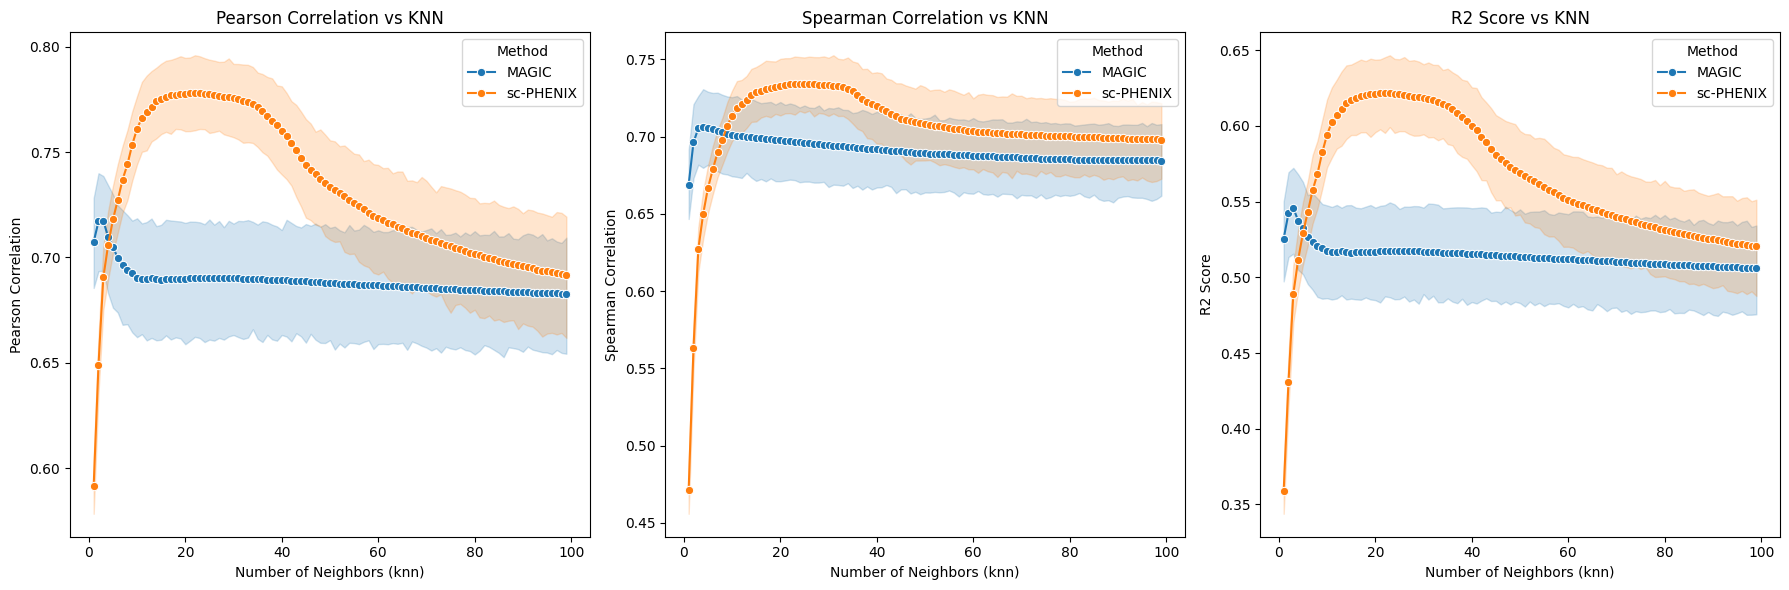

In [12]:
# Ejemplo de uso de la función con datos simulados
results = run_analysis_knn_variation(real=TrueEXpre, porcentaje=80, seed=62, t=5, decay=5, n_pca=15, knn_range=range(1, 100),umap_dim=umap_dim)
print(results.head())
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 6))

# Subplot for Pearson correlation
plt.subplot(1, 3, 1)
sns.lineplot(data=results, x='Value', y='Pearson', hue='Method', marker='o')
plt.title('Pearson Correlation vs KNN')
plt.xlabel('Number of Neighbors (knn)')
plt.ylabel('Pearson Correlation')

# Subplot for Spearman correlation
plt.subplot(1, 3, 2)
sns.lineplot(data=results, x='Value', y='Spearman', hue='Method', marker='o')
plt.title('Spearman Correlation vs KNN')
plt.xlabel('Number of Neighbors (knn)')
plt.ylabel('Spearman Correlation')

# Subplot for R2 Score
plt.subplot(1, 3, 3)
sns.lineplot(data=results, x='Value', y='R2', hue='Method', marker='o')
plt.title('R2 Score vs KNN')
plt.xlabel('Number of Neighbors (knn)')
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()


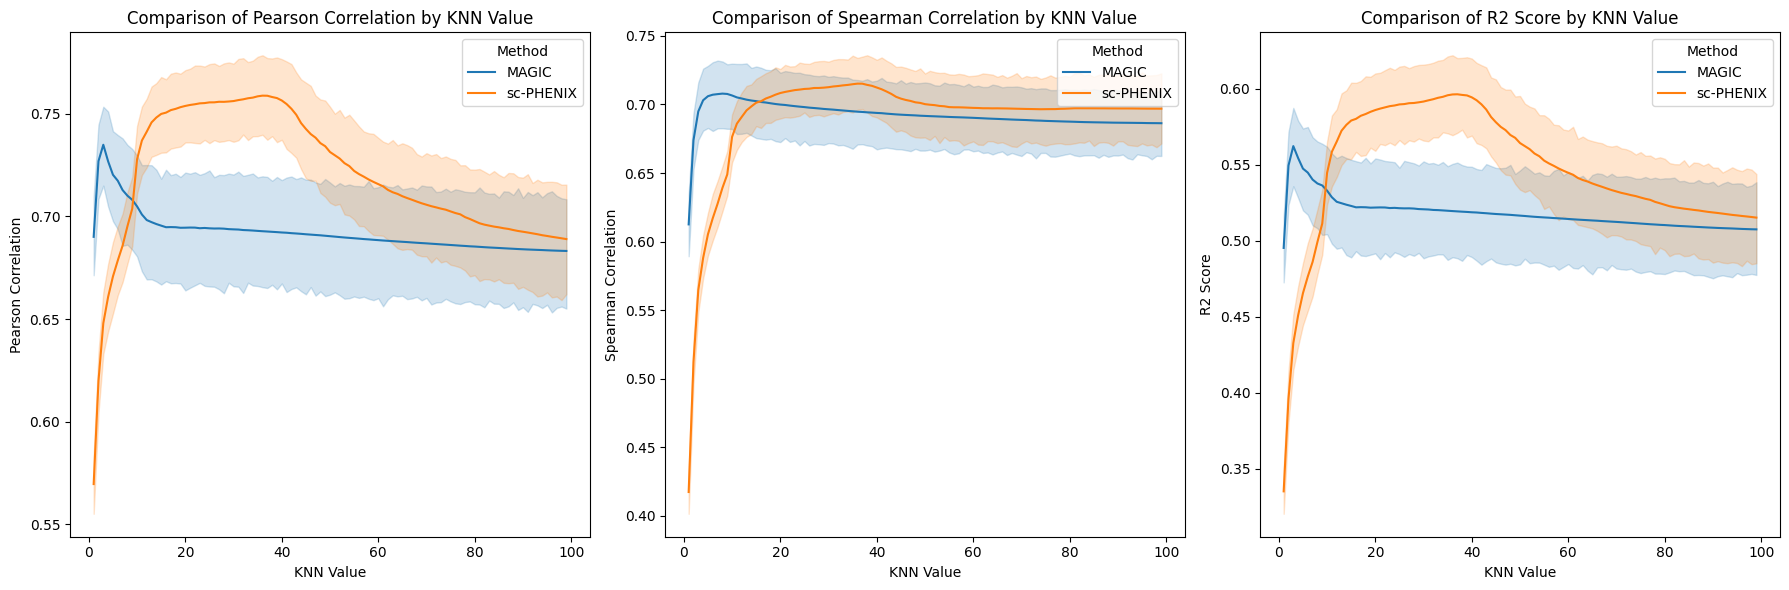

In [60]:
# Adjusting the y-axis scale of the bar charts to be consistent across all metrics from 0.3 to 1
plt.figure(figsize=(18, 6))

# Pearson bar plot with adjusted y-axis
plt.subplot(1, 3, 1)
sns.lineplot(data=results, x='Value', y='Pearson', hue='Method')
plt.title('Comparison of Pearson Correlation by KNN Value')
plt.xlabel('KNN Value')
plt.ylabel('Pearson Correlation')

# Spearman bar plot with adjusted y-axis
plt.subplot(1, 3, 2)
sns.lineplot(data=results, x='Value', y='Spearman', hue='Method')
plt.title('Comparison of Spearman Correlation by KNN Value')
plt.xlabel('KNN Value')
plt.ylabel('Spearman Correlation')

# R2 bar plot with adjusted y-axis
plt.subplot(1, 3, 3)
sns.lineplot(data=results, x='Value', y='R2', hue='Method')
plt.title('Comparison of R2 Score by KNN Value')
plt.xlabel('KNN Value')
plt.ylabel('R2 Score')


plt.tight_layout()
plt.show()


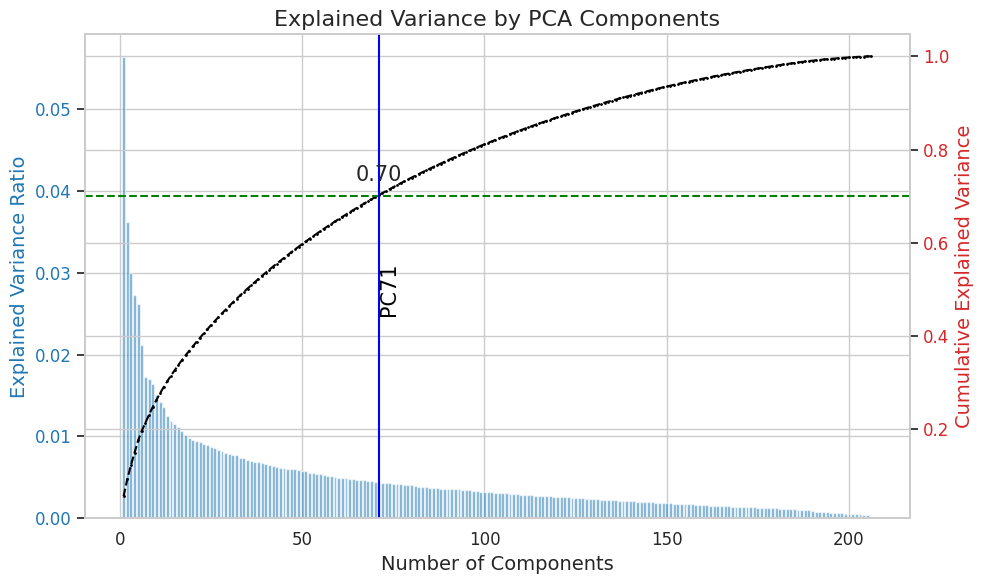

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import seaborn as sns

# Configurar el estilo de seaborn
sns.set(style="whitegrid")


pca = PCA().fit(dropout)

# Calcular la varianza explicada y la varianza explicada acumulativa
explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Crear la gráfica
fig, ax1 = plt.subplots(figsize=(10, 6))

# Gráfica de barras para la varianza explicada por cada componente
color = 'tab:blue'
ax1.set_xlabel('Number of Components', fontsize=14)
ax1.set_ylabel('Explained Variance Ratio', color=color, fontsize=14)
ax1.bar(range(1, len(explained_variance) + 1), explained_variance, color=color, alpha=0.6)
ax1.tick_params(axis='y', labelcolor=color, labelsize=12)
ax1.tick_params(axis='x', labelsize=12)

# Crear un segundo eje para la varianza explicada acumulativa
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Cumulative Explained Variance', color=color, fontsize=14)
ax2.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--', color='Black',markersize=1)
ax2.axhline(y=0.70, color='green', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color, labelsize=12)

# Añadir anotaciones para el punto donde la varianza acumulativa alcanza el 70%
for i, variance in enumerate(cumulative_variance):
    if variance >= 0.70:
        ax2.annotate(f'{variance:.2f}', (i + 1, variance), textcoords="offset points", xytext=(0, 10), ha='center', fontsize=15)
        ax2.axvline(x=i + 1, color='Blue', linestyle='-')
        ax2.text(i + 1, 0.5, f'PC{i + 1}', rotation=90, verticalalignment='center', fontsize=15, color='Black')
        break

# Título de la gráfica
plt.title('Explained Variance by PCA Components', fontsize=16)

# Ajustar el layout para evitar recortes
fig.tight_layout()

# Mostrar la gráfica
plt.show()


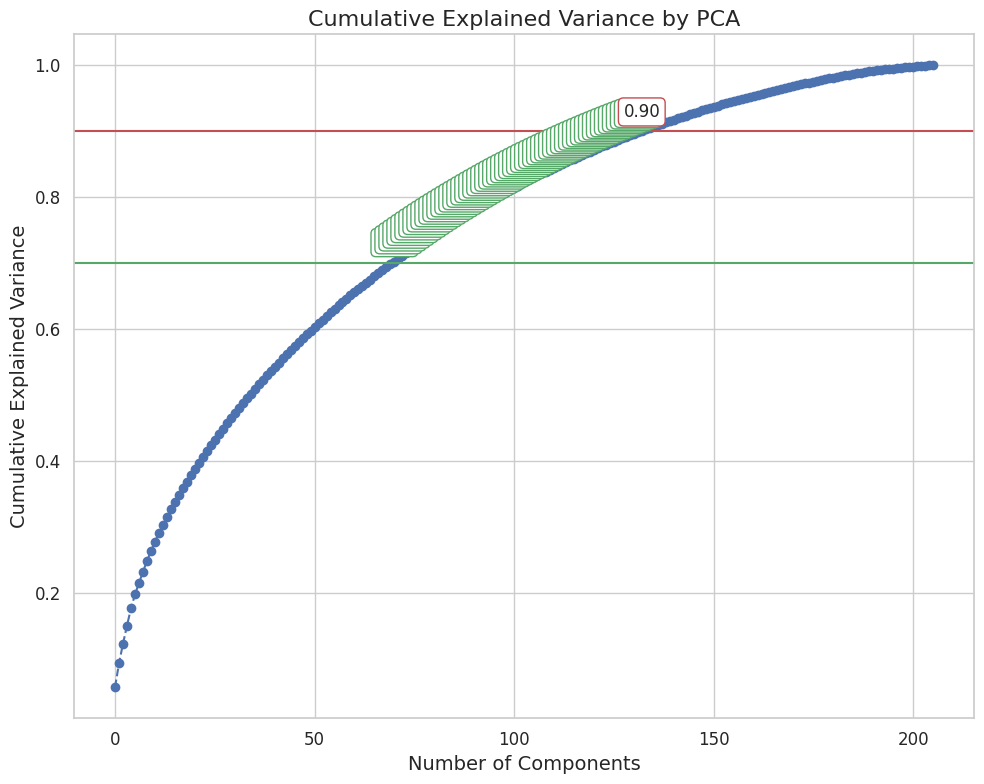